In [2]:
# Importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")

In [56]:
## Reading Thyroid Data set with the help of Pandas

data=pd.read_csv(r"D:\Thyroid_Disease_Detection\notebooks\data\hypothyroid.csv")
data 

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
data.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [48]:
data['TBG'].isnull().sum().sum()/(data.shape[1]*(data.shape[0]))*100

0.0

### Pre-Processing

In [7]:
# 
numeric_columns = ['age', 'TT4', 'T4U','FTI', 'TBG', 'TSH', 'T3' ]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('float64')

In [8]:
data.isnull().sum()

age                             1
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [9]:
# Made a for Loop to check invalid values in dataset  

for i in data.columns:
    count=data[i][data[i]=="?"].count()
    if count != 0 :
        print(i,data[i][data[i]=="?"].count())

sex 150


### Before Replacing Invalid values Dropping the unwanted columns

In [10]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [11]:
# Dropping Unwanted Columns

data=data.drop(['on thyroxine', 'query on thyroxine',
       'on antithyroid medication',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
        'TSH measured','hypopituitary','psych',
       'T3 measured',  'TT4 measured', 'T4U measured', 
       'FTI measured'],axis=1)

In [12]:
# Final Data To work on 
data

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,f,NaN,other,P
3,70.0,F,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,f,NaN,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,t,NaN,NaN,NaN,NaN,NaN,f,NaN,other,P
3768,68.0,F,f,f,f,f,f,1.00,2.1,124.0,1.08,114.0,f,NaN,SVI,P
3769,74.0,F,f,f,f,f,f,5.10,1.8,112.0,1.07,105.0,f,NaN,other,P
3770,72.0,M,f,f,f,f,f,0.70,2.0,82.0,0.94,87.0,f,NaN,SVI,P


In [13]:
#For Loop to replace values in columns 

for i in data.columns:
    count=data[i][data[i]=='?'].count()
    if count != 0 :
        data[i]=data[i].replace("?",np.nan)

In [14]:
# Checking the replaced values 

for i in data.columns:
    count=data[i][data[i]=='?'].count()
    if count== 0:
        print(i,data[i][data[i]=='?'].count())

age 0
sex 0
sick 0
pregnant 0
thyroid surgery 0
goitre 0
tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
TBG measured 0
TBG 0
referral source 0
binaryClass 0


##### All invalid "?" values replaced with np.nan

In [15]:
data.isnull().values.any()

True

In [16]:
data.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid surgery', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG measured', 'TBG',
       'referral source', 'binaryClass'],
      dtype='object')

In [17]:
cat_feature=[column for column in data.columns if data[column].dtype=="O"]
data[cat_feature]

,sex,sick,pregnant,thyroid surgery,goitre,tumor,TBG measured,referral source,binaryClass
0,F,f,f,f,f,f,f,SVHC,P
1,F,f,f,f,f,f,f,other,P
2,M,f,f,f,f,f,f,other,P
3,F,f,f,f,f,f,f,other,P
4,F,f,f,f,f,f,f,SVI,P
...,...,...,...,...,...,...,...,...,...
3767,F,f,f,f,f,t,f,other,P
3768,F,f,f,f,f,f,f,SVI,P
3769,F,f,f,f,f,f,f,other,P
3770,M,f,f,f,f,f,f,SVI,P


In [18]:
cat_feature

['sex',
 'sick',
 'pregnant',
 'thyroid surgery',
 'goitre',
 'tumor',
 'TBG measured',
 'referral source',
 'binaryClass']

In [19]:
num_feature=[column for column in data.columns if data[column].dtype!="O"]
data[num_feature]

,age,TSH,T3,TT4,T4U,FTI,TBG
0,41.0,1.30,2.5,125.0,1.14,109.0,NaN
1,23.0,4.10,2.0,102.0,NaN,NaN,NaN
2,46.0,0.98,NaN,109.0,0.91,120.0,NaN
3,70.0,0.16,1.9,175.0,NaN,NaN,NaN
4,70.0,0.72,1.2,61.0,0.87,70.0,NaN
...,...,...,...,...,...,...,...
3767,30.0,NaN,NaN,NaN,NaN,NaN,NaN
3768,68.0,1.00,2.1,124.0,1.08,114.0,NaN
3769,74.0,5.10,1.8,112.0,1.07,105.0,NaN
3770,72.0,0.70,2.0,82.0,0.94,87.0,NaN


In [20]:
data.loc[:, cat_feature] = data[cat_feature].fillna(data.mode().iloc[0])

In [21]:
data[cat_feature].isnull().sum()

sex                0
sick               0
pregnant           0
thyroid surgery    0
goitre             0
tumor              0
TBG measured       0
referral source    0
binaryClass        0
dtype: int64

In [22]:
mean_num=data[num_feature].mean()

In [23]:
data.loc[:, num_feature] = data[num_feature].fillna(mean_num)

In [24]:
data['TBG'].fillna(0, inplace=True)

In [25]:
data.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid surgery    0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
TBG measured       0
TBG                0
referral source    0
binaryClass        0
dtype: int64

In [26]:
data

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,1.300000,2.5000,125.000000,1.140,109.000000,f,0.0,SVHC,P
1,23.0,F,f,f,f,f,f,4.100000,2.0000,102.000000,0.995,110.469649,f,0.0,other,P
2,46.0,M,f,f,f,f,f,0.980000,2.0135,109.000000,0.910,120.000000,f,0.0,other,P
3,70.0,F,f,f,f,f,f,0.160000,1.9000,175.000000,0.995,110.469649,f,0.0,other,P
4,70.0,F,f,f,f,f,f,0.720000,1.2000,61.000000,0.870,70.000000,f,0.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,t,5.086766,2.0135,108.319345,0.995,110.469649,f,0.0,other,P
3768,68.0,F,f,f,f,f,f,1.000000,2.1000,124.000000,1.080,114.000000,f,0.0,SVI,P
3769,74.0,F,f,f,f,f,f,5.100000,1.8000,112.000000,1.070,105.000000,f,0.0,other,P
3770,72.0,M,f,f,f,f,f,0.700000,2.0000,82.000000,0.940,87.000000,f,0.0,SVI,P


In [27]:
data['age'].astype('int64')

0       41
1       23
2       46
3       70
4       70
        ..
3767    30
3768    68
3769    74
3770    72
3771    64
Name: age, Length: 3772, dtype: int64

In [28]:
data

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,1.300000,2.5000,125.000000,1.140,109.000000,f,0.0,SVHC,P
1,23.0,F,f,f,f,f,f,4.100000,2.0000,102.000000,0.995,110.469649,f,0.0,other,P
2,46.0,M,f,f,f,f,f,0.980000,2.0135,109.000000,0.910,120.000000,f,0.0,other,P
3,70.0,F,f,f,f,f,f,0.160000,1.9000,175.000000,0.995,110.469649,f,0.0,other,P
4,70.0,F,f,f,f,f,f,0.720000,1.2000,61.000000,0.870,70.000000,f,0.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,t,5.086766,2.0135,108.319345,0.995,110.469649,f,0.0,other,P
3768,68.0,F,f,f,f,f,f,1.000000,2.1000,124.000000,1.080,114.000000,f,0.0,SVI,P
3769,74.0,F,f,f,f,f,f,5.100000,1.8000,112.000000,1.070,105.000000,f,0.0,other,P
3770,72.0,M,f,f,f,f,f,0.700000,2.0000,82.000000,0.940,87.000000,f,0.0,SVI,P


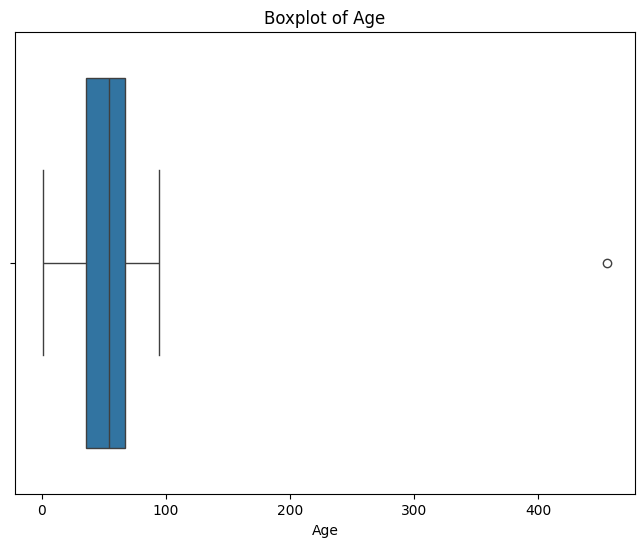

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [30]:
# Calculate the first quartile (Q1)
Q1 = data['age'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = data['age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_filtered = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Check the shape of the filtered data to see how many outliers were removed
print("Shape of original data:", data.shape)
print("Shape of data after removing outliers:", data_filtered.shape)

Shape of original data: (3772, 16)
Shape of data after removing outliers: (3771, 16)


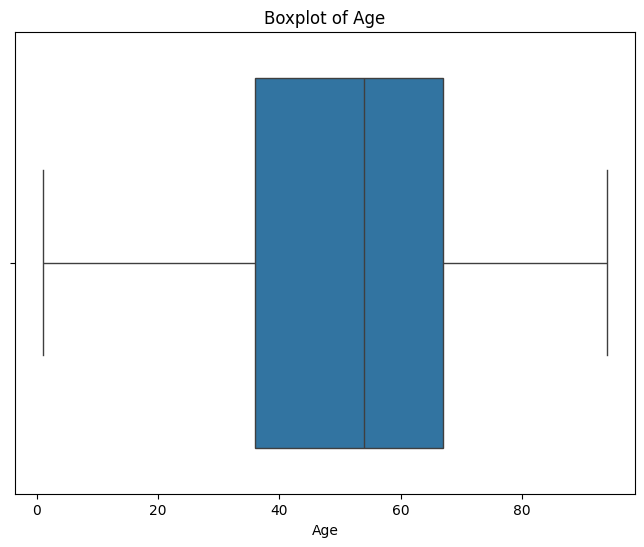

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_filtered['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [32]:
data_filtered

,age,sex,sick,pregnant,thyroid surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,1.300000,2.5000,125.000000,1.140,109.000000,f,0.0,SVHC,P
1,23.0,F,f,f,f,f,f,4.100000,2.0000,102.000000,0.995,110.469649,f,0.0,other,P
2,46.0,M,f,f,f,f,f,0.980000,2.0135,109.000000,0.910,120.000000,f,0.0,other,P
3,70.0,F,f,f,f,f,f,0.160000,1.9000,175.000000,0.995,110.469649,f,0.0,other,P
4,70.0,F,f,f,f,f,f,0.720000,1.2000,61.000000,0.870,70.000000,f,0.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,t,5.086766,2.0135,108.319345,0.995,110.469649,f,0.0,other,P
3768,68.0,F,f,f,f,f,f,1.000000,2.1000,124.000000,1.080,114.000000,f,0.0,SVI,P
3769,74.0,F,f,f,f,f,f,5.100000,1.8000,112.000000,1.070,105.000000,f,0.0,other,P
3770,72.0,M,f,f,f,f,f,0.700000,2.0000,82.000000,0.940,87.000000,f,0.0,SVI,P


In [33]:
label_encoder = LabelEncoder()
for column in data_filtered.columns:
    data_filtered[column] = label_encoder.fit_transform(data_filtered[column])

In [34]:
data_filtered.nunique()

age                 93
sex                  2
sick                 2
pregnant             2
thyroid surgery      2
goitre               2
tumor                2
TSH                288
T3                  70
TT4                242
T4U                147
FTI                235
TBG measured         1
TBG                  1
referral source      5
binaryClass          2
dtype: int64

In [35]:
X = data_filtered.drop(columns=['binaryClass'])
y = data_filtered['binaryClass']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)

In [42]:
accuracy

0.9708609271523179